# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import linregress
from statsmodels.formula.api import ols
from scipy.stats import f

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
def extraction(df):
    values = df.replace('€', '')
    if 'M' in df:
        values = float(values.replace('M', ''))*1000000
    elif 'K' in df:
        values = float(values.replace('K', ''))*1000
    return float(values)


valuenumeric = fifa['Value'].apply(extraction)
fifa['ValueNumeric'] = valuenumeric
fifa.columns=fifa.columns.str.replace(' ', '_')
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93000000.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67000000.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80000000.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51000000.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
group=fifa["Preferred_Foot"].unique()
df_anova=fifa[['ValueNumeric', 'Preferred_Foot']].reset_index()
data={g: df_anova.ValueNumeric[df_anova["Preferred_Foot"]==g] for g in group}
data

{'Left': 0        110500000.0
 13        60000000.0
 15        89000000.0
 17        78000000.0
 19        53500000.0
 24        27000000.0
 26        69500000.0
 28        69500000.0
 35        43000000.0
 36        60000000.0
 37        36000000.0
 42        57000000.0
 47        62500000.0
 49        38000000.0
 51        34000000.0
 55        61000000.0
 56        59500000.0
 57        41500000.0
 64        36500000.0
 65        46500000.0
 74        43500000.0
 79        54000000.0
 80        50000000.0
 83        50500000.0
 84        40500000.0
 85        38000000.0
 103       26000000.0
 106       21500000.0
 112       32000000.0
 113       34000000.0
             ...     
 18037        50000.0
 18041        60000.0
 18048        50000.0
 18049        50000.0
 18055        30000.0
 18056        60000.0
 18058        50000.0
 18060        60000.0
 18061        40000.0
 18063        70000.0
 18070        60000.0
 18076        50000.0
 18078        50000.0
 18085        50000.0
 1

In [6]:
f_score, p_value=stats.f_oneway(data['Left'], data['Right'])
print(f_score, p_value)


5.1325938662072685 0.02349233836415891


In [7]:
from statsmodels.formula.api import ols
modelo=ols('ValueNumeric ~ C(Preferred_Foot)*C(Position)', fifa).fit()
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),2.341622e+14,1.0,7.734728,5.422475e-03
C(Position),1.657002e+16,26.0,21.051242,2.211476e-97
C(Preferred_Foot):C(Position),5.152828e+15,26.0,6.546369,5.153228e-23
Residual,5.477500e+17,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
# Your conclusions here:
#el valor del jugador no es afectado ni por la posicion ni por el pie preferido sin embargo puede que influya un poco mas la posicion donde juega


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:
modelo=ols('ValueNumeric ~ C(Nationality)', fifa).fit()
res=sm.stats.anova_lm(modelo, typ=2)
res


,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
# Your code here:
fifan=fifa.dropna()


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [11]:
# Your code here:
import warnings
x=sm.add_constant(fifan[['Stamina','SprintSpeed']])
y=fifan.ValueNumeric
modelo=sm.OLS(y, x).fit()
predic=modelo.predict(x)
modelo.summary()





C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          8.04e-193
Time:                        19:26:26   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      0.000   -3.46e+06   -2.68e+06
Stamina      6.037e+04   3290.118     18.349      0.000    5.39e+04    6.68e+04
SprintSpeed  2.631e+04   3565.332      7.380      0.000    1.93e+04    3.33e+04
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [12]:
# Your conclusions here: los datos no sirven para realizar una prediccion cuando sepamos, la velocidad de sprint, ni stamina


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [13]:
# Your code here:
x=sm.add_constant(fifan.Potential)
y=fifan.ValueNumeric
modelo=sm.OLS(y, x).fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:26:26   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.000   -3.62e+07   -3.47e+07
Potential   5.312e+05   5581.083     95.172      0.000     5.2e+05    5.42e+05
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [14]:
# Your conclusions here: los datos de potencial si son importantes para el valor, por lo que se podria inferir que podriamos pronosticar el valor de mercado de un jugador por su potencial



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

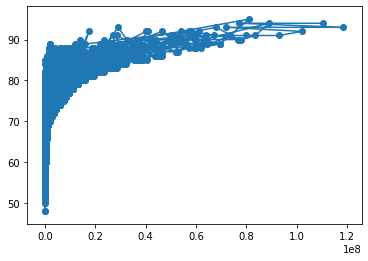

In [28]:
# Your code here:
x=fifa.ValueNumeric
y=fifa.Potential
plt.plot(x, y)
plt.scatter(x,y)
plt.show();
